In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lgl_nodes = {
    1: [0],
    2: [-1, 1],
    3: [-1, 0, 1],
    4: [-1, -np.sqrt(1 / 5), np.sqrt(1 / 5), 1],
    5: [-1, -np.sqrt(3 / 7), 0, np.sqrt(3 / 7), 1],
    6: [-1, -np.sqrt(1 / 3 + 2 * np.sqrt(7) / 21), -np.sqrt(1 / 3 - 2 * np.sqrt(7) / 21),
        np.sqrt(1 / 3 - 2 * np.sqrt(7) / 21), np.sqrt(1 / 3 + 2 * np.sqrt(7) / 21), 1],
    7: [-1, -0.830223896278566929872, -0.468848793470714213803772,
        0, 0.468848793470714213803772, 0.830223896278566929872, 1],
    8: [-1, -0.8717401485096066153375, -0.5917001814331423021445,
        -0.2092992179024788687687, 0.2092992179024788687687,
        0.5917001814331423021445, 0.8717401485096066153375, 1],
    9: [-1, -0.8997579954114601573124, -0.6771862795107377534459,
        -0.3631174638261781587108, 0, 0.3631174638261781587108,
        0.6771862795107377534459, 0.8997579954114601573124, 1],
    10: [-1, -0.9195339081664588138289, -0.7387738651055050750031,
         -0.4779249498104444956612, -0.1652789576663870246262,
         0.1652789576663870246262, 0.4779249498104444956612,
         0.7387738651055050750031, 0.9195339081664588138289, 1]
}

# Equispaced points

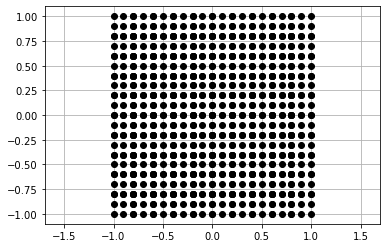

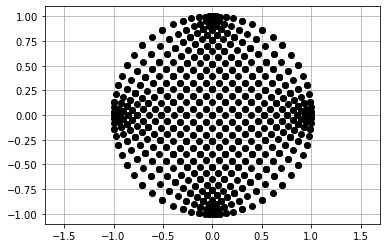

In [3]:
elements, order = 10, 3
size = elements*order
points = np.array(lgl_nodes.get(order, "nothing"))

def create_grid(low, high, num):
    length = high - low
    dx = length / num
    nodes_iso = (np.array(points) + 1) / 2
    xl = np.linspace(low, high - dx, num=num)
    arr = np.zeros((num, order))
    for i in range(num):
        arr[i, :] = xl[i] + dx * np.array(nodes_iso)
    return arr

x = create_grid(-1, 1, num=elements)
y = create_grid(-1, 1, num=elements)
ix, iy = np.ones_like(x), np.ones_like(y)

points_x, points_y = np.tensordot(x, iy, axes=0), np.tensordot(ix, y, axes=0)
z = points_x + 1j * points_y

# Transform points
K = 1.8540747
def square_the_circle(z, terms):
    out = np.zeros_like(z) + 0j
    # pre-operate
    z_prime = K/2*np.exp(-1j*np.pi/4)*(z+1j+1)
    for m in range(1-terms, terms):
        out += 1.19814 * (-1)**m * (1/np.cosh(1.19814 * (z_prime - 2.622 * m)))
    return out

# Check it out
zeta = square_the_circle(z, terms=25)
zr = np.real(zeta).reshape(size, size)
zi = np.imag(zeta).reshape(size, size)

plt.figure()
plt.plot(np.real(z).reshape(size, size), np.imag(z).reshape(size, size), 'ko')
plt.grid(True), plt.axis('equal')

plt.figure()
plt.plot(zr, zi, 'ko')
plt.grid(True), plt.axis('equal')
plt.show()

# One big high-order element

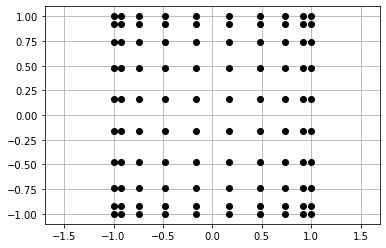

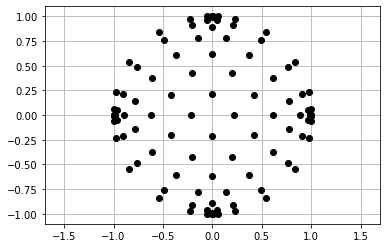

In [4]:
elements, order = 1, 10
size = elements*order
points = np.array(lgl_nodes.get(order, "nothing"))

def create_grid(low, high, num):
    length = high - low
    dx = length / num
    nodes_iso = (np.array(points) + 1) / 2
    xl = np.linspace(low, high - dx, num=num)
    arr = np.zeros((num, order))
    for i in range(num):
        arr[i, :] = xl[i] + dx * np.array(nodes_iso)
    return arr

x = create_grid(-1, 1, num=elements)
y = create_grid(-1, 1, num=elements)
ix, iy = np.ones_like(x), np.ones_like(y)

points_x, points_y = np.tensordot(x, iy, axes=0), np.tensordot(ix, y, axes=0)
z = points_x + 1j * points_y

# Transform points
K = 1.8540747
def square_the_circle(z, terms):
    out = np.zeros_like(z) + 0j
    # pre-operate
    z_prime = K/2*np.exp(-1j*np.pi/4)*(z+1j+1)
    for m in range(1-terms, terms):
        out += 1.19814 * (-1)**m * (1/np.cosh(1.19814 * (z_prime - 2.622 * m)))
    return out

# Check it out
zeta = square_the_circle(z, terms=25)
zr = np.real(zeta).reshape(size, size)
zi = np.imag(zeta).reshape(size, size)

plt.figure()
plt.plot(np.real(z).reshape(size, size), np.imag(z).reshape(size, size), 'ko')
plt.grid(True), plt.axis('equal')

plt.figure()
plt.plot(zr, zi, 'ko')
plt.grid(True), plt.axis('equal')
plt.show()

# Many medium-order elements

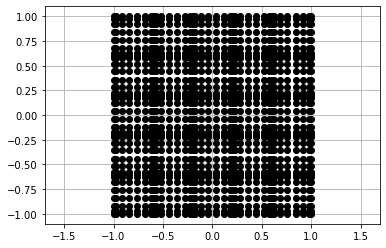

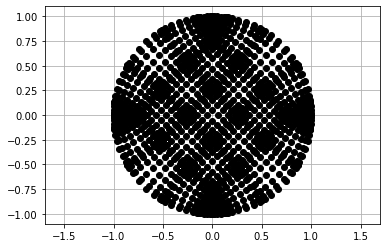

In [5]:
elements, order = 5, 8
size = elements*order
points = np.array(lgl_nodes.get(order, "nothing"))

def create_grid(low, high, num):
    length = high - low
    dx = length / num
    nodes_iso = (np.array(points) + 1) / 2
    xl = np.linspace(low, high - dx, num=num)
    arr = np.zeros((num, order))
    for i in range(num):
        arr[i, :] = xl[i] + dx * np.array(nodes_iso)
    return arr

x = create_grid(-1, 1, num=elements)
y = create_grid(-1, 1, num=elements)
ix, iy = np.ones_like(x), np.ones_like(y)

points_x, points_y = np.tensordot(x, iy, axes=0), np.tensordot(ix, y, axes=0)
z = points_x + 1j * points_y

# Transform points
K = 1.8540747
def square_the_circle(z, terms):
    out = np.zeros_like(z) + 0j
    # pre-operate
    z_prime = K/2*np.exp(-1j*np.pi/4)*(z+1j+1)
    for m in range(1-terms, terms):
        out += 1.19814 * (-1)**m * (1/np.cosh(1.19814 * (z_prime - 2.622 * m)))
    return out

# Check it out
zeta = square_the_circle(z, terms=25)
zr = np.real(zeta).reshape(size, size)
zi = np.imag(zeta).reshape(size, size)

plt.figure()
plt.plot(np.real(z).reshape(size, size), np.imag(z).reshape(size, size), 'ko')
plt.grid(True), plt.axis('equal')

plt.figure()
plt.plot(zr, zi, 'ko')
plt.grid(True), plt.axis('equal')
plt.show()

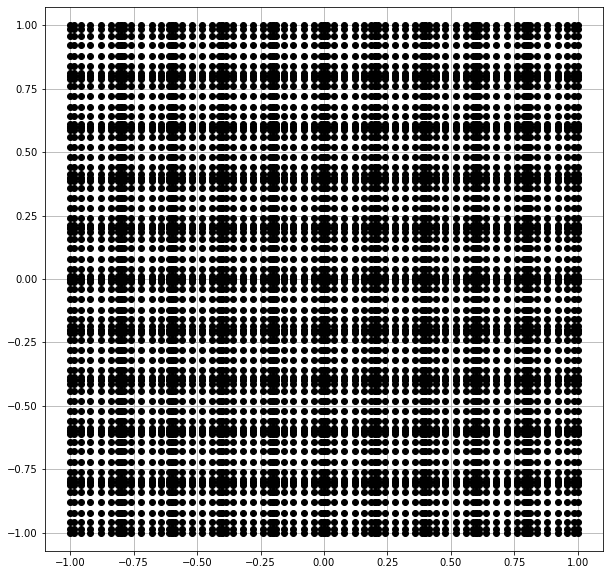

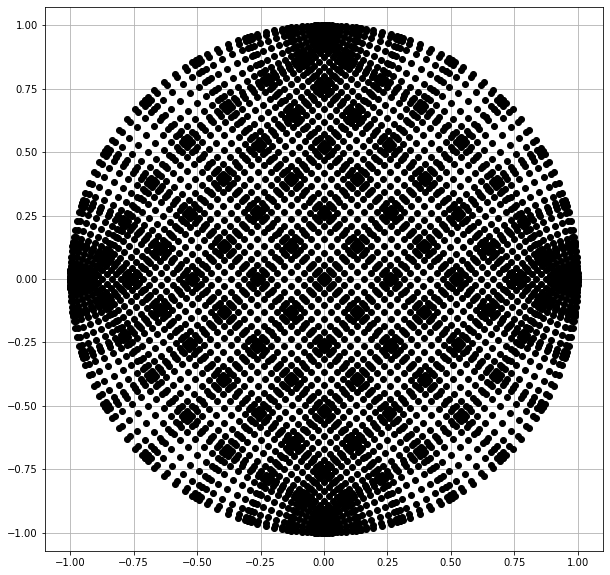

In [6]:
elements, order = 10, 8
order_low = 3
size = elements*order
points = np.array(lgl_nodes.get(order, "nothing"))
points_low = np.array(lgl_nodes.get(order_low, "nothing"))

def create_grid(low, high, num, nodes):
    length = high - low
    dx = length / num
    nodes_iso = (np.array(nodes) + 1) / 2
    xl = np.linspace(low, high - dx, num=num)
    arr = np.zeros((num, order))
    for i in range(num):
        arr[i, :] = xl[i] + dx * np.array(nodes_iso)
    return arr

x = create_grid(-1, 1, num=elements, nodes=points)
y = create_grid(-1, 1, num=elements, nodes=points)
ix, iy = np.ones_like(x), np.ones_like(y)

points_x, points_y = np.tensordot(x, iy, axes=0), np.tensordot(ix, y, axes=0)
z = points_x + 1j * points_y

# Transform points
K = 1.8540747
def square_the_circle(z, terms):
    out = np.zeros_like(z) + 0j
    # pre-operate
    z_prime = K/2*np.exp(-1j*np.pi/4)*(z+1j+1)
    for m in range(1-terms, terms):
        out += 1.19814 * (-1)**m * (1/np.cosh(1.19814 * (z_prime - 2.622 * m)))
    return out

# Check it out
zeta = square_the_circle(z, terms=25)
zr = np.real(zeta).reshape(size, size)
zi = np.imag(zeta).reshape(size, size)

plt.figure(figsize=(10,10))
plt.plot(np.real(z).reshape(size, size), np.imag(z).reshape(size, size), 'ko')
plt.axis('equal'), plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(zr, zi, 'ko')
plt.grid(True), plt.axis('equal')
plt.show()

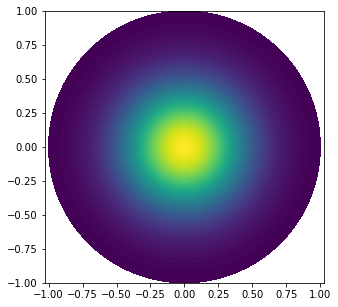

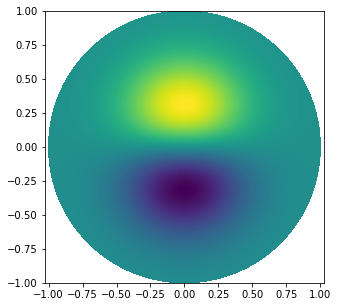

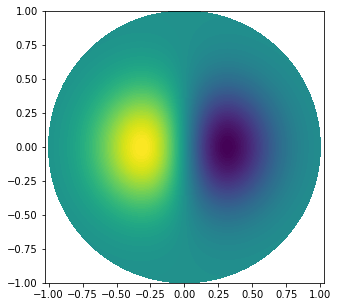

In [21]:
dist = np.exp(-(zr**2.0 + zi**2.0)/(2.0*0.1))
cb = np.linspace(np.amin(dist), np.amax(dist), num=100)

# fluxes
flux_x = zi*dist
flux_y = -zr*dist
cbx = np.linspace(np.amin(flux_x), np.amax(flux_x), num=100)
cby = np.linspace(np.amin(flux_y), np.amax(flux_y), num=100)

plt.figure(figsize=(5,5))
plt.contourf(zr, zi, dist, cb)
plt.axis('equal')

plt.figure(figsize=(5,5))
plt.contourf(zr, zi, flux_x, cbx)
plt.axis('equal')


plt.figure(figsize=(5,5))
plt.contourf(zr, zi, flux_y, cby)
plt.axis('equal')

# inverse transform


plt.show()